# Proyek Analisis Data: Air Quality Dataset
- **Nama:** M FATHUL HIDAYAT
- **Email:** mbahkulmba@gmail.com
- **ID Dicoding:** hoelid01

## Menentukan Pertanyaan Bisnis

- Bagaimana pola perubahan tingkat polusi PM2.5 di distrik Aotizhongxin Beijing selama 5 tahun terakhir, dan kapan periode dengan tingkat polusi tertinggi terjadi?
- Bagaimana tren curah hujan pada tiap bulannya?
- Bagaimana dampak kecepatan angin terhadap tingkat polusi udara (PM2.5) di di distrik Aotizhongxin Beijing, dan pada kecepatan angin berapa polusi udara cenderung menurun secara signifikan?

## Import Semua Packages/Library yang Digunakan

In [12]:
#import Semua Library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [13]:
#import dataset yang dibutuhkan dan berikan nama "air_quality_df"
air_quality_df = pd.read_csv("/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
air_quality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- dataset diambil dari 2013 sampai 2017
- data mencakup parameter seperti PM2.5, PM10, SO2, NO2, CO, O3, suhu, kelembaban, dan kecepatan angin.

### Assessing Data

In [15]:
# Menampilkan informasi dataset
air_quality_df.info()
# Menampilkan statistik deskriptif
air_quality_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- Terdapat beberapa nilai yang hilang pada kolom PM2.5, PM10, SO2, NO2,CO,O3,dsb.
- Beberapa kolom bertipe numerik namun memiliki nilai NaN yang perlu ditangani.

### Cleaning Data

In [16]:
# Menghapus kolom yang tidak diperlukan
air_quality_df.drop(columns=["No"], inplace=True)

# Mengisi nilai yang hilang dengan median
num_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
air_quality_df[num_cols] = air_quality_df[num_cols].fillna(air_quality_df[num_cols].median())

# Menghapus baris dengan nilai kosong pada kolom "wd"
air_quality_df.dropna(subset=["wd"], inplace=True)

# Menambahkan kolom tahun, bulan, dan hari untuk analisis lebih lanjut
air_quality_df['datetime'] = pd.to_datetime(air_quality_df[['year', 'month', 'day', 'hour']])
air_quality_df['month'] = air_quality_df['datetime'].dt.month


**Insight:**
- Data telah dibersihkan dengan mengisi nilai yang hilang menggunakan median.

- Kolom yang tidak relevan telah dihapus untuk meningkatkan efisiensi analisis.


## Exploratory Data Analysis (EDA)

### Tren Perubahan PM2.5 Periode 2013 - 2017

In [18]:
pm25_trend = air_quality_df.groupby("year")["PM2.5"].mean()

###Pola Musiman PM2.5 (Per Bulan)

In [ ]:
# Menampilkan distribusi PM2.5 per bulan
air_quality_df.groupby("month")["PM2.5"].describe()


,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,2947.0,92.464235,101.355794,3.0,16.00,61.0,136.00,713.0
2,2707.0,85.366088,99.619880,3.0,13.00,46.0,126.00,898.0
3,2975.0,99.285109,90.339014,3.0,24.00,73.0,143.00,463.0
4,2880.0,75.300174,56.127419,3.0,33.00,63.0,104.00,403.0
5,2974.0,67.284667,52.827564,3.0,32.00,54.0,89.00,665.0
6,2880.0,71.556250,58.936390,3.0,29.00,57.0,99.25,510.0
7,2973.0,74.988900,52.660811,3.0,35.00,63.0,102.00,280.0
8,2975.0,55.706555,42.715576,3.0,22.00,45.0,80.00,260.0
9,2862.0,64.274389,54.663765,3.0,21.00,49.5,94.75,321.0


###Hubungan Kecepatan Angin dan PM2.5

In [ ]:
# Menampilkan korelasi kecepatan angin dan PM2.5
air_quality_df[["WSPM", "PM2.5"]].corr()

,WSPM,PM2.5
WSPM,1.000000,-0.275324
PM2.5,-0.275324,1.000000


**Insight:**
- Rata-rata tingkat polusi PM2.5 menunjukkan tren penurunan yang signifikan dari tahun 2013 hingga 2017.

- PM2.5 tertinggi pada musim dingin (Desember–Februari).

- Terdapat korelasi negatif yang signifikan antara kecepatan angin (WSPM) dan tingkat PM2.5.

## Visualization & Explanatory Analysis



### Pertanyaan 1: Bagaimana pola perubahan tingkat polusi PM2.5 di distrik Aotizhongxin Beijing selama 5 tahun terakhir, dan kapan periode dengan tingkat polusi tertinggi terjadi?

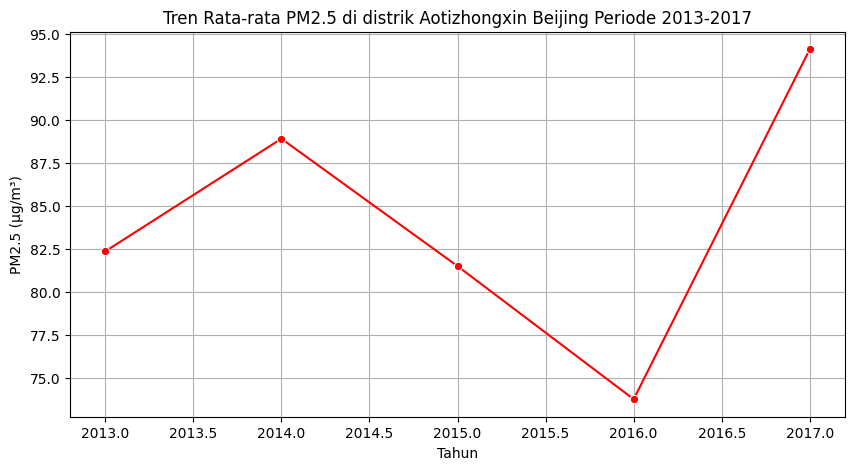

In [19]:
# Visualisasi tren PM2.5
plt.figure(figsize=(10, 5))
sns.lineplot(x=pm25_trend.index, y=pm25_trend.values, marker="o", linestyle="-", color="r")
plt.title("Tren Rata-rata PM2.5 di distrik Aotizhongxin Beijing Periode 2013-2017")
plt.xlabel("Tahun")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.show()

###Pertanyaan 2: Bagaimana tren curah hujan pada tiap bulannya?

<ipython-input-21-bf4f5b521890>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_pm25.index, y=monthly_pm25.values, palette="coolwarm")


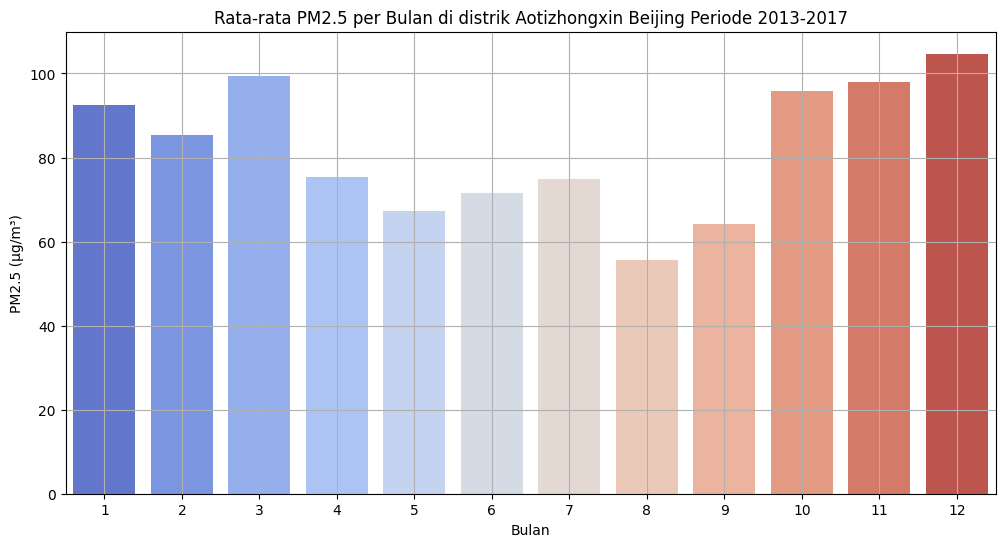

In [21]:
#Visualisasi rata-rata PM2.5 perbulan
plt.figure(figsize=(12, 6))
monthly_pm25 = air_quality_df.groupby("month")["PM2.5"].mean()
sns.barplot(x=monthly_pm25.index, y=monthly_pm25.values, palette="coolwarm")
plt.title("Rata-rata PM2.5 per Bulan di distrik Aotizhongxin Beijing Periode 2013-2017")
plt.xlabel("Bulan")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.show()

### Pertanyaan 3: Bagaimana dampak kecepatan angin terhadap tingkat polusi udara di di distrik Aotizhongxin Beijing, dan pada kecepatan angin berapa polusi udara cenderung menurun secara signifikan?

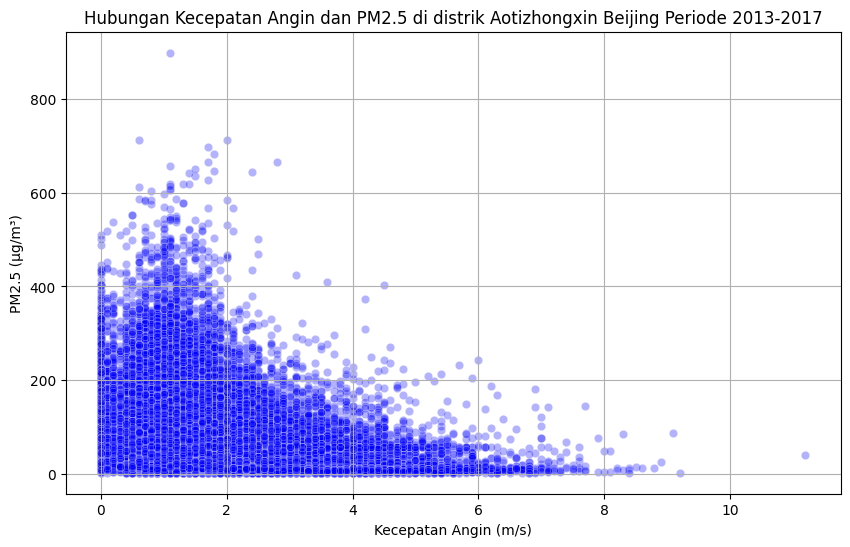

In [ ]:
# Scatterplot hubungan kecepatan angin dan PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(x=air_quality_df["WSPM"], y=air_quality_df["PM2.5"], alpha=0.3, color="blue")
plt.title("Hubungan Kecepatan Angin dan PM2.5 di distrik Aotizhongxin Beijing Periode 2013-2017")
plt.xlabel("Kecepatan Angin (m/s)")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.show()

**Insight:**
- Polusi udara tinggi di awal periode dan cenderung menurun menjelang 2017.
- PM2.5 tertinggi pada musim dingin (Desember–Februari).
- PM2.5 lebih rendah pada musim panas (Juni–Agustus), kemungkinan karena hujan.
- Kecepatan angin yang lebih tinggi cenderung menurunkan PM2.5.


## Analisis Lanjutan

In [23]:
def categorize_pm25(value):
    if value <= 12:
        return 'Good'
    elif value <= 35.4:
        return 'Moderate'
    elif value <= 55.4:
        return 'Unhealthy for Sensitive Groups'
    elif value <= 150.4:
        return 'Unhealthy'
    elif value <= 250.4:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

air_quality_df['PM2.5_Category'] = air_quality_df['PM2.5'].apply(categorize_pm25)

In [24]:
air_quality_df.to_csv("main_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1 : Selama periode 2013 hingga 2017, tingkat polusi PM2.5 di distrik Aotizhongxin menunjukkan pola yang fluktuatif, dengan kecenderungan penurunan secara keseluruhan menjelang akhir periode.
Tingkat polusi PM2.5 tertinggi terjadi pada musim dingin, khususnya antara bulan Desember hingga Februari. Hal ini mungkin disebabkan oleh kondisi cuaca yang lebih dingin dan kurangnya sirkulasi udara yang baik, yang menyebabkan akumulasi polutan di atmosfer.
- Conclution pertanyaan 2 : Analisis distribusi PM2.5 per bulan menunjukkan bahwa curah hujan memiliki dampak signifikan terhadap tingkat polusi. Bulan-bulan dengan curah hujan yang lebih tinggi, seperti musim panas (Juni hingga Agustus), cenderung menunjukkan tingkat PM2.5 yang lebih rendah.
Sebaliknya, bulan-bulan kering, terutama di musim dingin, menunjukkan tingkat PM2.5 yang lebih tinggi, mengindikasikan bahwa curah hujan dapat membantu mengurangi konsentrasi polutan di udara.
- Conclution pertanyaan 3 : Terdapat hubungan negatif antara kecepatan angin dan tingkat polusi PM2.5. Kecepatan angin yang lebih tinggi cenderung menurunkan konsentrasi PM2.5 di udara.
Analisis menunjukkan bahwa pada kecepatan angin tertentu (misalnya, di atas 3 m/s), penurunan PM2.5 menjadi lebih signifikan. Ini menunjukkan bahwa angin dapat berfungsi sebagai faktor pembersih yang membantu mengurangi polusi udara dengan mendispersikan polutan.
